In [1]:
import pandas as pd

df = pd.read_csv("../data/sierraleone-bumbuna.csv") 
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
df.describe()
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [3]:
# using Z score for outlier detection and basic cleaning
from scipy import stats
import numpy as np

numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[numeric_cols]))

df_clean = df[(z_scores < 3).all(axis=1)].copy()


In [4]:
for col in numeric_cols:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].median())

In [5]:
# Step 8 — Time Series Analysis
#Ensure Timestamp is in datetime format
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

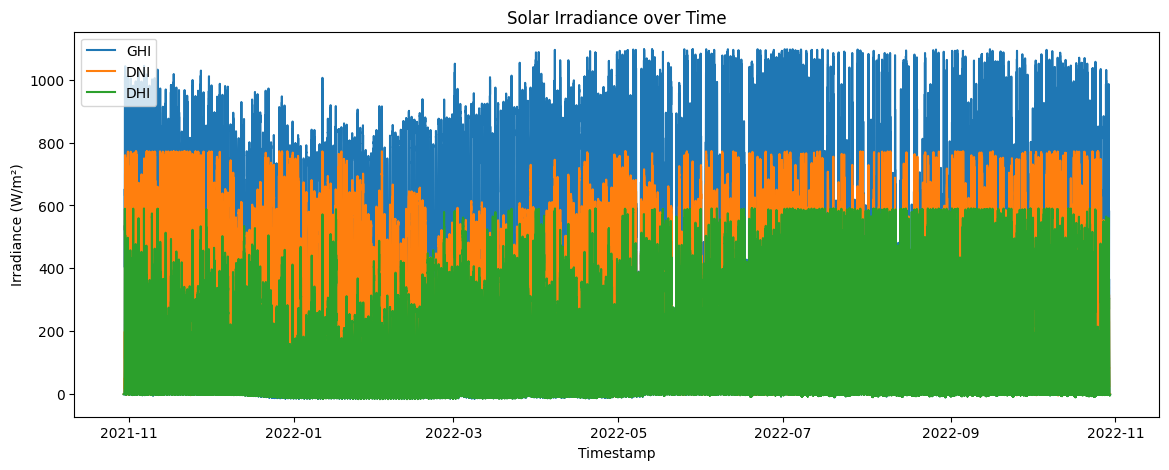

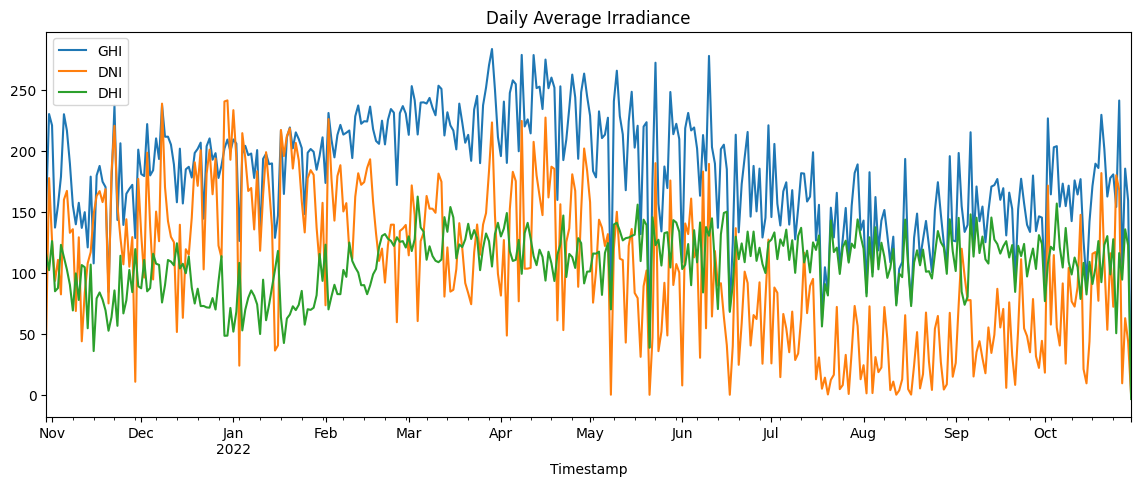

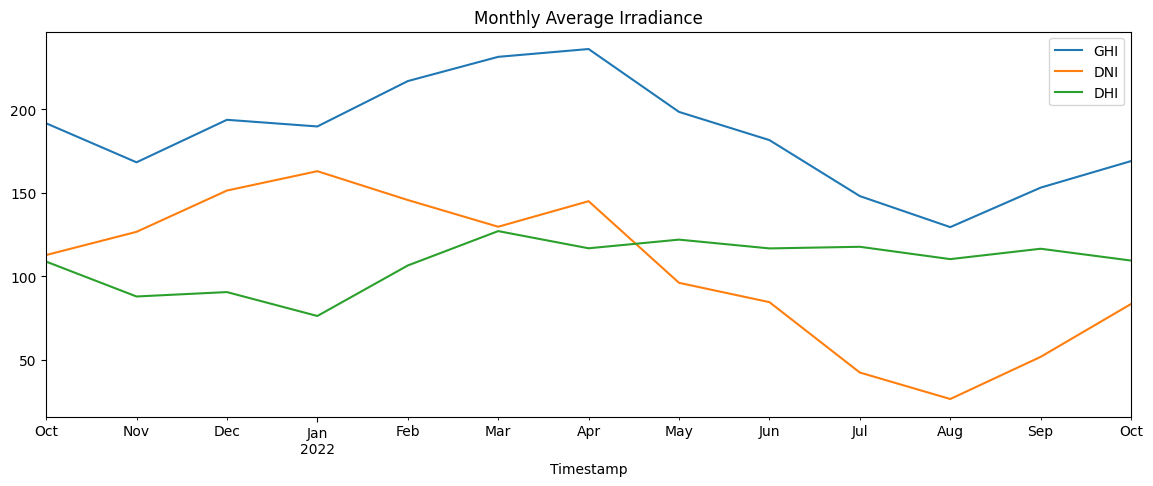

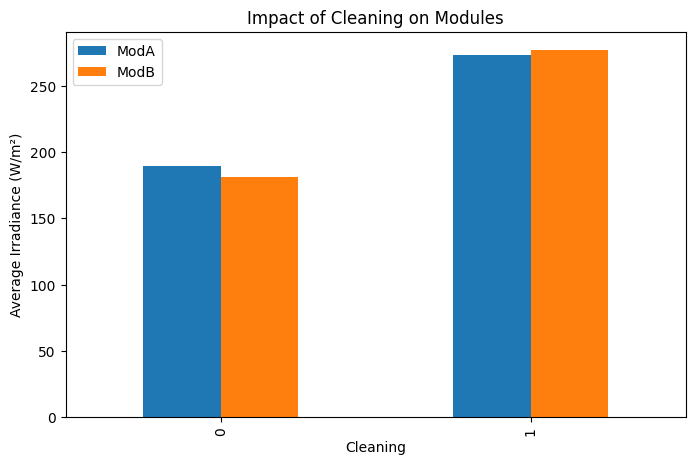

In [7]:
#Plot GHI, DNI, DHI over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df_clean.index, df_clean['GHI'], label='GHI')
plt.plot(df_clean.index, df_clean['DNI'], label='DNI')
plt.plot(df_clean.index, df_clean['DHI'], label='DHI')
plt.title("Solar Irradiance over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.show()

# Daily mean
daily_mean = df_clean.resample('D').mean()
daily_mean[['GHI','DNI','DHI']].plot(figsize=(14,5), title="Daily Average Irradiance")
plt.show()

# Monthly mean
monthly_mean = df_clean.resample('ME').mean()
monthly_mean[['GHI','DNI','DHI']].plot(figsize=(14,5), title="Monthly Average Irradiance")
plt.show()

df_clean.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', figsize=(8,5))
plt.title("Impact of Cleaning on Modules")
plt.ylabel("Average Irradiance (W/m²)")
plt.show()


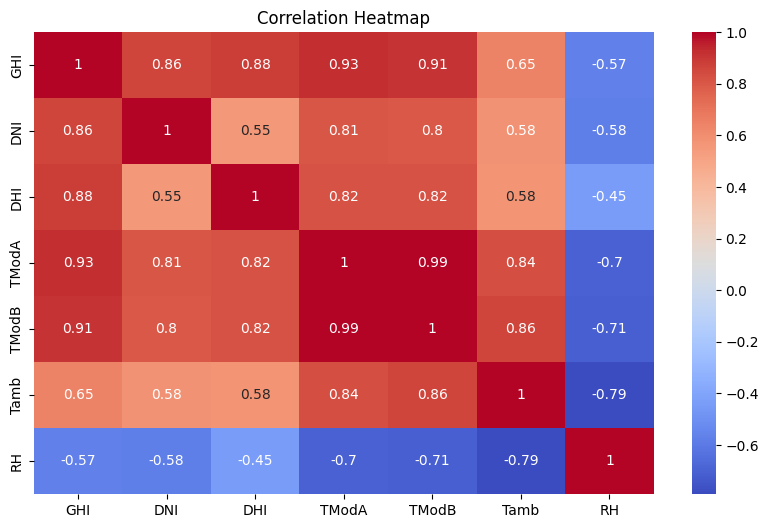

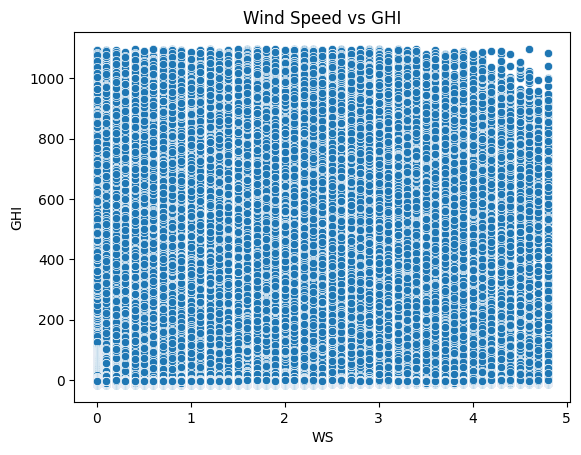

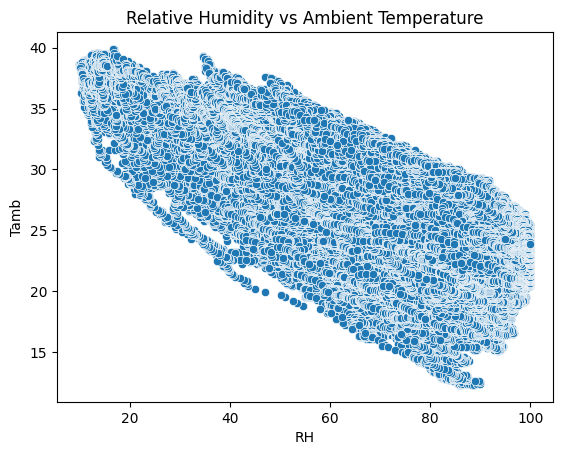

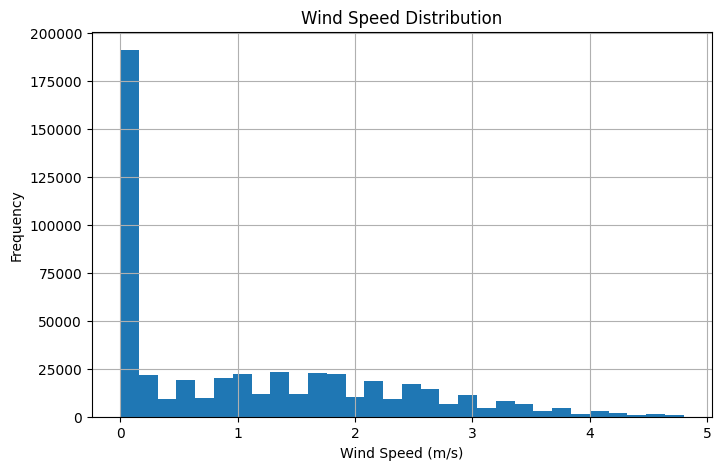

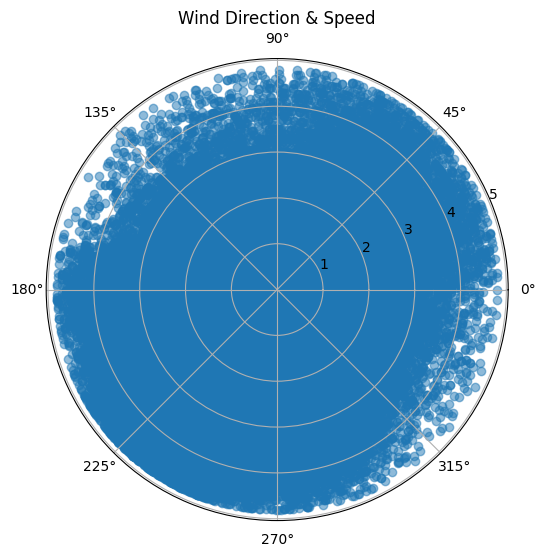

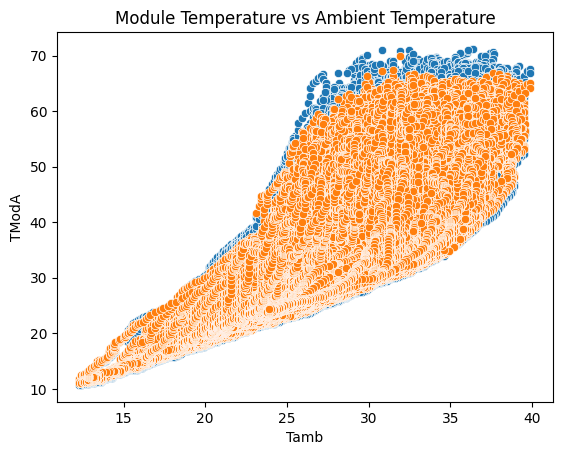

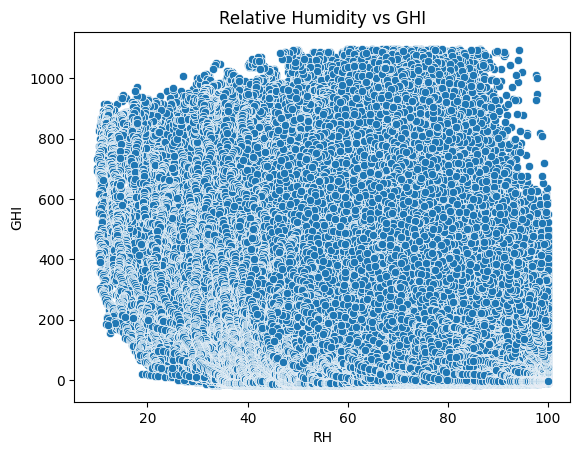

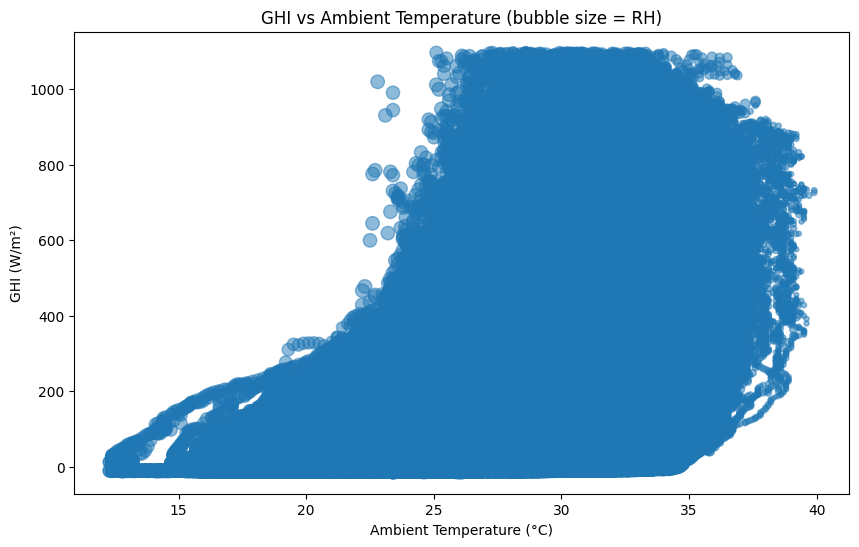

In [8]:
#Correlation & Relationship Analysis
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','Tamb','RH']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
# Wind vs GHI
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs GHI")
plt.show()

# Relative Humidity vs Temperature
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Ambient Temperature")
plt.show()
# 11 Wind & Distribution Analysis
#Histogram of Wind Speed
df_clean['WS'].hist(bins=30, figsize=(8,5))
plt.title("Wind Speed Distribution")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

#Wind Direction Analysis (optional: wind rose)
plt.figure(figsize=(6,6))
plt.subplot(111, polar=True)
theta = np.deg2rad(df_clean['WD'])
r = df_clean['WS']
plt.scatter(theta, r, alpha=0.5)
plt.title("Wind Direction & Speed")
plt.show()
#Temperature Analysis
sns.scatterplot(x='Tamb', y='TModA', data=df_clean)
sns.scatterplot(x='Tamb', y='TModB', data=df_clean)
plt.title("Module Temperature vs Ambient Temperature")
plt.show()
 
sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.title("Relative Humidity vs GHI")
plt.show()

# Bubble Chart (Optional, Insightful)

plt.figure(figsize=(10,6))
plt.scatter(
    df_clean['Tamb'], df_clean['GHI'], 
    s=df_clean['RH'], alpha=0.5
)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Ambient Temperature (bubble size = RH)")
plt.show()



In [ ]:
df_clean.to_csv("../data/sierra_clean.csv", index=False)